In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/2year_meth_2class.pkl')
merged.head()

,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,cg04118974,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
id,,,,,,,,,,,,,,,,,,,,,
n342,1,0.956262,0.966190,0.017425,0.986983,0.017852,0.970931,0.697796,0.906683,0.618114,...,0.012783,0.956217,0.962080,0.966986,0.871912,0.900723,0.011595,0.012854,0.946241,0.015264
n350,0,0.958675,0.969429,0.012830,0.990860,0.009751,0.975918,0.718653,0.901881,0.593790,...,0.009830,0.951044,0.960288,0.969185,0.874465,0.901721,0.009979,0.013626,0.959538,0.014229
n353,1,0.962803,0.971532,0.025681,0.984491,0.019077,0.971796,0.686410,0.922719,0.623876,...,0.007944,0.947009,0.959314,0.966536,0.882370,0.899057,0.007216,0.009941,0.954694,0.014220
n355,0,0.958330,0.970704,0.017563,0.988419,0.016279,0.971972,0.691018,0.932405,0.647621,...,0.011632,0.956308,0.967834,0.969869,0.857640,0.896367,0.007949,0.013030,0.946981,0.011747
n356,0,0.963839,0.967334,0.013839,0.984374,0.007206,0.969843,0.688611,0.890146,0.549694,...,0.008732,0.951932,0.961968,0.962723,0.912635,0.892361,0.013803,0.014002,0.954942,0.015852


In [3]:
merged = merged.reset_index(drop=False)
merged.head()

,id,end,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,...,cg23020486,cg10295858,cg11606463,cg04767756,cg05166473,cg19812938,cg06272054,cg07255356,cg24220897,cg12325588
0,n342,1,0.956262,0.966190,0.017425,0.986983,0.017852,0.970931,0.697796,0.906683,...,0.012783,0.956217,0.962080,0.966986,0.871912,0.900723,0.011595,0.012854,0.946241,0.015264
1,n350,0,0.958675,0.969429,0.012830,0.990860,0.009751,0.975918,0.718653,0.901881,...,0.009830,0.951044,0.960288,0.969185,0.874465,0.901721,0.009979,0.013626,0.959538,0.014229
2,n353,1,0.962803,0.971532,0.025681,0.984491,0.019077,0.971796,0.686410,0.922719,...,0.007944,0.947009,0.959314,0.966536,0.882370,0.899057,0.007216,0.009941,0.954694,0.014220
3,n355,0,0.958330,0.970704,0.017563,0.988419,0.016279,0.971972,0.691018,0.932405,...,0.011632,0.956308,0.967834,0.969869,0.857640,0.896367,0.007949,0.013030,0.946981,0.011747
4,n356,0,0.963839,0.967334,0.013839,0.984374,0.007206,0.969843,0.688611,0.890146,...,0.008732,0.951932,0.961968,0.962723,0.912635,0.892361,0.013803,0.014002,0.954942,0.015852


In [28]:
from sklearn.utils import shuffle
shuffled = shuffle(merged)
shuffled.to_pickle('../dataset/2year_meth_shuffled_2class.pkl')
#shuffled = pd.read_pickle('../dataset/2year_meth_shuffled_2class.pkl')
labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end','id']))
print(labels.shape)
print(features.shape)

X = features
Y = labels
print(Y)

(18,)
(18, 729735)
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]


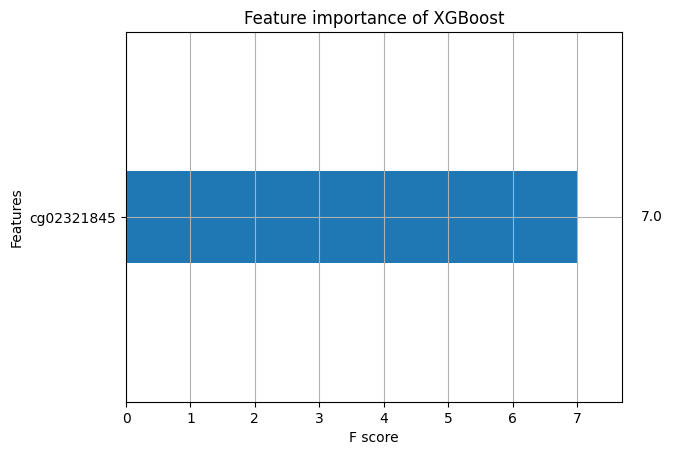

In [29]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from sklearn.utils import class_weight

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y, sample_weight=class_weight.compute_sample_weight("balanced", Y))

feature_names = merged.drop(columns=['end','id']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/2yearmeth2class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [6]:
import lightgbm as lgb
model_name='LightGBM'
feature_names = merged.drop(columns=['end','id']).columns.values.tolist()

params = {
    'task': 'train',
    'boosting_type': 'gbdt',  
    'objective': 'regression',  
    'metric': {'auc'},  
    'num_leaves': 20,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.9,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'verbose': 1  
}

import lightgbm as lgb
train = lgb.Dataset(data=merged.drop(columns=['end','id']),label=merged['end'])
#clf = lgb.LGBMClassifier(n_jobs=-1)
clf = lgb.train(params,train)

ax = lgb.plot_importance(clf, height=0.5, max_num_features=13)
plt.title('Feature importance of '  + model_name)

plt.savefig('../images/2yearmeth2class/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 18, number of used features: 0
[LightGBM] [Info] Start training from score 0.166667
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGB

ValueError: not enough values to unpack (expected 2, got 0)

In [30]:
# 2-feature
feature2 = shuffled[['cg02321845','end']]
feature2

,cg02321845,end
0,0.936357,1
12,0.857533,0
15,0.877390,0
16,0.807111,0
6,0.916133,0
5,0.929066,1
14,0.900793,0
3,0.789918,0
10,0.800838,0
1,0.879400,0


In [31]:
train = feature2[0:int(0.85*shuffled.shape[0])]
test = feature2[int(0.85*shuffled.shape[0]):]

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

In [32]:
feature2.to_pickle('../dataset/2year_meth_2class_feature2.pkl')
feature2.to_csv('../dataset/2year_meth_2class_feature2.csv')

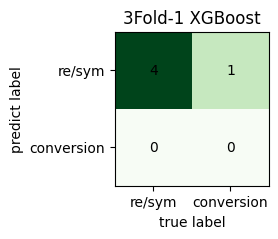

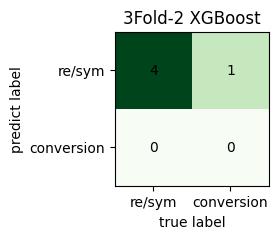

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

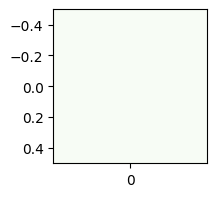

In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=4)
for train_index, valid_index in cv.split(X):
    train_x,test_x = np.array(feature2.drop(columns=['end']))[train_index], np.array(feature2.drop(columns=['end']))[valid_index]
    train_y,test_y = np.array(feature2['end'])[train_index], np.array(feature2['end'])[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(3): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    confusion = confusion_matrix(cv_label[i], y_score)

    ax = plt.figure(figsize=(2, 2))
    #ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
    ax = plt.imshow(confusion.T, cmap='Greens')
    indices = range(len(confusion))
    classes = ['re/sym', 'conversion']
    #ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.xlabel("true label")
    plt.ylabel("predict label")
    plt.title('3Fold-' + str(i+1) + ' ' + model_name)
    for first_index in range(len(confusion)):
        for second_index in range(len(confusion[first_index])):
            plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
            #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
    
    plt.savefig('../images/2yearmeth2class/4Fold-' + str(i+1) + '-' + model_name + '.png',dpi=300, bbox_inches = 'tight')
    plt.show()
#
